**Project Name**: HR Analytics - Predicting Employee Turnover

**Author**: Ankur Dhamija

**Connect on Linkedin**: https://www.linkedin.com/in/ankurdhamija/

--------

# HR Analytics - Predicting Employee Turnover

-------

## 1. Executive summary

------

## 2. Business problem and motivation

-----

## 3. Load the required libraries

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import sys
import os

In [2]:
# getting the name of the directory
# where the this file is present.
current = os.path.dirname(os.path.realpath("ml_utils.py"))
  
# Getting the parent directory name
# where the current directory is present.
parent = os.path.dirname(current)
  
# adding the parent directory to 
# the sys.path.
sys.path.append(parent)

In [3]:
from ml_utils import *

In [4]:
#Display settings
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [5]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")


-------

## 4. Load the dataset

In [6]:
df = pd.read_csv("data/HR-Dataset.csv", index_col=None)

In [7]:
#Visualize the dataframe
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


--------

## 5. Overview of the dataset

**Shape of the Dataset:**

(14999, 10)
-----------------




**Number of rows and columns in the Dataset:**

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')
-----------------




**Basic information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
-----------------




**Percentage null values in the Dataset:**

salary                   0.0
sales                    0.0
promotion_last_5years    0.0
left                     0.0
Work_accident            0.0
time_spend_company       0.0
average_montly_hours     0.0
number_project           0.0
last_evaluation          0.0
satisfaction_level       0.0
dtype: float64
-----------------




**Total number of duplicated rows in the Dataset:**

3008
-----------------




**Categorical columns in the Dataset:**

['salary', 'sales']
-----------------




**Unique values across categorical columns in the Dataset:**

Unique values in the column:  salary
{'low': 7316, 'medium': 6446, 'high': 1237}
-----------------


Unique values in the column:  sales
{'sales': 4140, 'technical': 2720, 'support': 2229, 'IT': 1227, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630}
-----------------


-----------------




**Visual representation of the Dataset:**

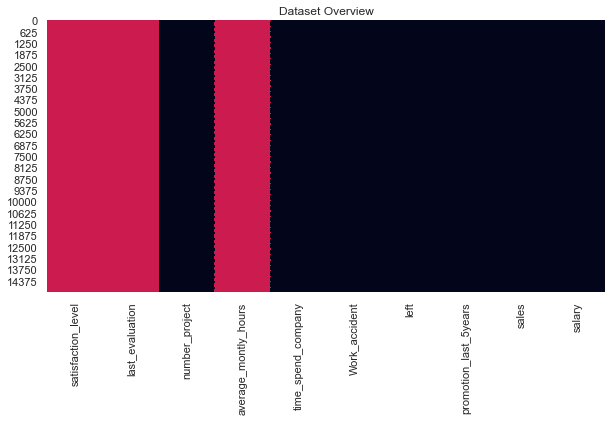

 Categorical   Numerical   NaN 


In [8]:
#Get an overview of the Dataset
df_overview(df, max_cat=20, figsize=(10,5))

-----

## 6. Data manipulation

### 6.1 Rename columns

In [9]:
# Renaming columns with a better description
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

### 6.2 Move target variable to the beginning of the dataset

In [10]:
# Moving the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### 6.3 Check and remove duplicates

In [11]:
# Earlier, we saw that there were duplicate rows in the dataset.
# Let's visualize the duplicate rows
duplicate = checkDuplicates(df)

Number of duplicate rows in the dataframe:  3008


In [12]:
df['turnover'].value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [13]:
#Remove duplicates
df.drop_duplicates(inplace=True)

-----

## 7. Dataset Overview - Exploratory Data Analysis

Let's explore the dataset and try to find some insights in the dataset. Some initial questions that can be explored 
- Turnover percentage across the firm
- Employee Attrition by years at company

## Employee Attrition

In [14]:
# Turnover Percentage across the firm
'{:.2%}'.format(df['turnover'].sum()/df['turnover'].count())

'16.60%'

**Key Findings**


<blockquote>
    There is <b>16.60% Employee attrition</b> at the firm.
</blockquote>

-------

## 7.2 ->  Attrition rate is maximum for employees with 5 years of experience at the firm

### Key Findings
- We see that maximum attrition is when employees have spent 5 years with the firm. 
- Another interesting thing to note is that attrition rises gradually from 2 years duration and peaks at 5 years.
- Attrition falls sharply after has employee has spent more than 5 years with the firm

May be its the case that there is some `retention bonus paid at 5 years employment` and few employees
`leave immediately after taking the the bonus`.

Or it could also be the case that the retention bonus is `conditional`. 
Employees who don't get the `bonus leave` and those who get the bonus `continue to stay` with the firm.

### Key takeaways for the HR Department
- Why attrition is rising gradually for employees in 2-5 years range?
- 70% of the total attrition comes from employees in 4-5 years range
- Can we use some retention policies that we have for employees in >6 years range to lower retention in 4-5 years range?

In [15]:
#Calculate attrition rate by number of years spent at the firm
attritionRate = df.groupby('yearsAtCompany')['turnover'].sum()/df.groupby('yearsAtCompany')['turnover'].count()

In [16]:
#View attrition rate
attritionRate

yearsAtCompany
2     0.010653
3     0.168401
4     0.246883
5     0.453861
6     0.201107
7     0.000000
8     0.000000
10    0.000000
Name: turnover, dtype: float64

<AxesSubplot:xlabel='yearsAtCompany', ylabel='turnover'>

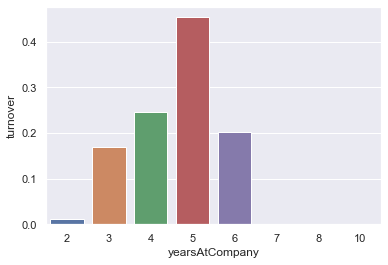

In [17]:
#Attrition rate by years spent at the firm
sns.barplot(x=attritionRate.index, y=attritionRate)

-------

## 7.3 ->  Employees with 3 to 5 years of experience reported lower satisfaction levels on average

### Key findings
- Average satisfaction levels dip for employees during 2 - 4 years stay at the firm
- Low satisfaction levels could be the reason for higher attrition rate in the employees with 2 - 5 years of stay bracket.
- Attrition distribution is tri-modal for employee satisfaction levels.
    - Certain Employees with `low` satisfaction
    - Majority of the Employees with `medium` satisfaction
    - Certain Employees with `high` satisfaction

### Key takeaways for the HR Department
- Why average satisfaction levels are low for employees in the 2-4 years range?
- Could low satisfaction levels be the reason for high attrition in the 2-4 years range?
- Why are employees with high satisfaction leaving the job? (May be better salary?)

In [18]:
#Average satisfaction levels by years spent at the firm
avgSatisfactionLevels = df.groupby('yearsAtCompany')['satisfaction'].mean()
avgSatisfactionLevels

yearsAtCompany
2     0.699165
3     0.648988
4     0.516090
5     0.583183
6     0.571107
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction, dtype: float64

In [19]:
#Create a Dataframe to visualize the trend between Emp Satisfaction levels and attrition rate
tempDf = pd.DataFrame({"avgSatisfactionLevels": avgSatisfactionLevels, 
        "attritionRate": attritionRate})

<AxesSubplot:xlabel='yearsAtCompany'>

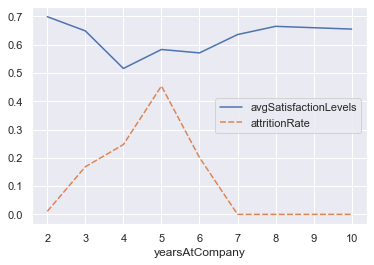

In [20]:
#View attrition rate and average satisfaction levels by years spent at the firm
sns.lineplot(data=tempDf)

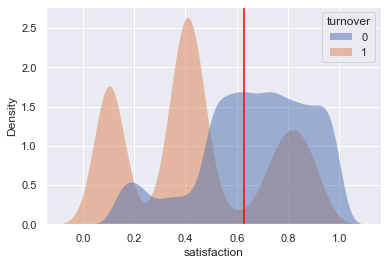

In [21]:
sns.kdeplot(data=df, x="satisfaction", hue="turnover", fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.axvline(x=df.satisfaction.mean(),
            color='red')

------

## 7.4 ->  As expected, attrition rate is high for employees with low salaries

### Key findings
- Nearly 20% attrition rate in employees with low salaries
- Certain high salaries staff is also leaving the company

### Key takeaways for the HR Department
- Benchmark salaries of low salaries staff to check whether salary can be improved for certain staff
- Why are certain high salaried employees leaving the firm?

In [22]:
#Calculate attrition rate by salary
attritionRateBySalary = df.groupby('salary')['turnover'].sum()/df.groupby('salary')['turnover'].count()

In [23]:
attritionRateBySalary

salary
high      0.048485
low       0.204530
medium    0.146170
Name: turnover, dtype: float64

<AxesSubplot:xlabel='salary', ylabel='turnover'>

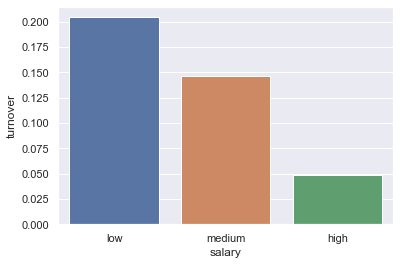

In [24]:
#Plot attrition rate by salary
sns.barplot(x=attritionRateBySalary.index, y=attritionRateBySalary, order=["low","medium","high"])

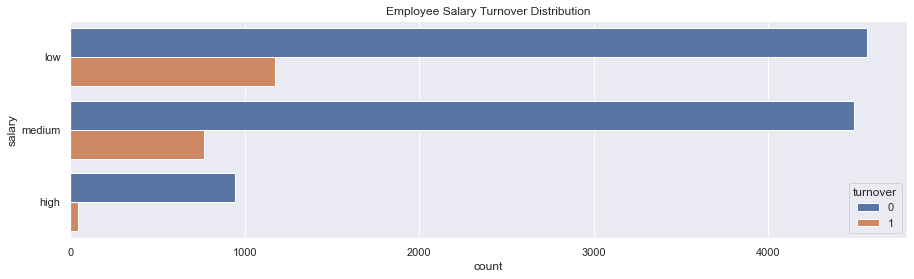

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

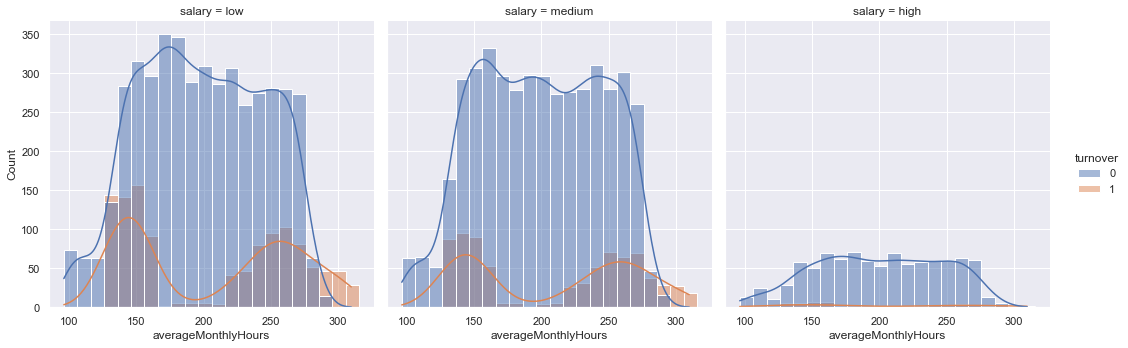

In [26]:
sns.displot(data=df, x="averageMonthlyHours", binwidth=10, kde=True, hue="turnover", col="salary")

-------

## 7.5 -> We note that there are 3 clusters of employees leaving the firm
- Top rated, Less satisfaction
- Top rated, Highly satisfaction
- Bottom rated, below average satisfaction

### Key takeaways for the HR Department
- Why were certain `Top rated` employees not satisfied with the firm?
    - Were they overworked?
    - Were they not satisfied with their job?
    - Was salary an issue?
    
- Why are `Top Rated` and `Highly satisfied employees` leaving the firm?
    - Are they looking for better opportunities?
    - Is salary or growth an issue for these set of employees?
    - Are they overworked?
    
- How can we help underperforming and unsatisfied employees?
    - Can we identify training gaps?
    - Is there some issue with our hiring policy, did we hire people with skills mismatch?

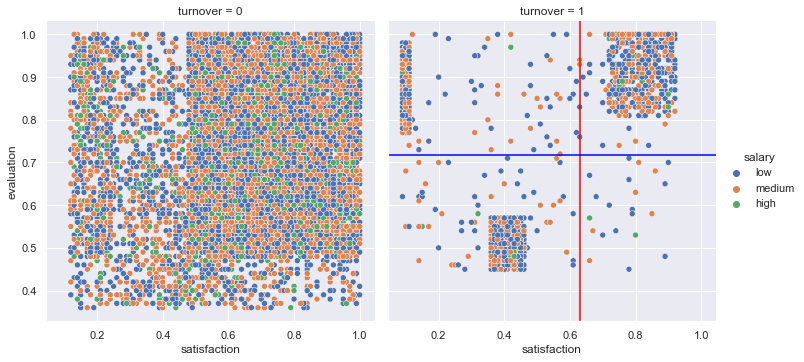

In [27]:
#Visualize scatter plot of satisfaction and evaluation 

#We create this scatterplot to understand how the combination of rating/evaluation effects employee turnover
sns.relplot(x="satisfaction", y="evaluation", col="turnover", hue="salary", data=df, kind="scatter")
plt.axvline(x=df.satisfaction.mean(),
            color='red')
plt.axhline(y=df.evaluation.mean(),
            color='blue')

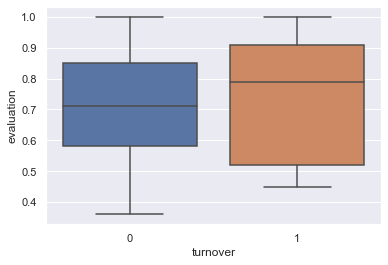

In [28]:
ax = sns.boxplot(x="turnover", y="evaluation", data=df)

-------

## 7.6 -> 54% of the employees who left the firm worked more than the average monthly hours (200 hours)
- Those employees worked hard and were highly satisfied with their job

### Key takeaways for the HR Department
- Why a group of hard working and highly satisfied employees left their job?

In [29]:
#Average working hours in the firm
df['averageMonthlyHours'].mean()

200.4735218080227

In [30]:
#Percentage of leaving employees who worked more than the average monthly hours
df.loc[(df["turnover"] == 1) & (df["averageMonthlyHours"] > 200), ["turnover"]].count()/df.loc[df["turnover"]==1,["turnover"]].count()

turnover    0.542943
dtype: float64

In [31]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


<function matplotlib.pyplot.show(close=None, block=None)>

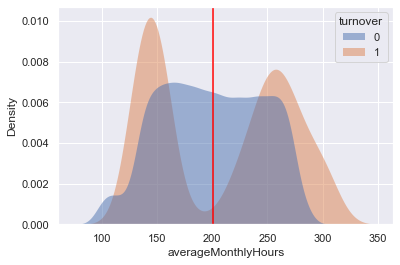

In [32]:
sns.kdeplot(data=df, x="averageMonthlyHours", hue="turnover", fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.axvline(x=df.averageMonthlyHours.mean(),
            color='red')
plt.show

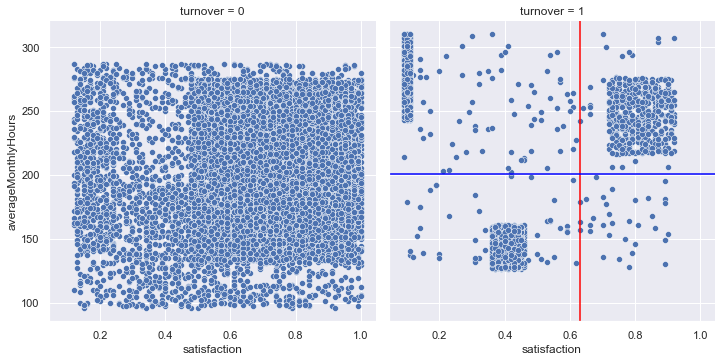

In [33]:
#Visualize scatter plot of satisfaction and evaluation 

#We create this scatterplot to understand how the combination of rating/evaluation effects employee turnover
sns.relplot(x="satisfaction", y="averageMonthlyHours", col="turnover", data=df, kind="scatter")
plt.axvline(x=df.satisfaction.mean(),
            color='red')
plt.axhline(y=df.averageMonthlyHours.mean(),
            color='blue')

------

## 7.7 -> Attrition by department

In [34]:
#Calculate average attrition by department
avgAttrition = (df.groupby(['department'])['turnover'].sum()/df.groupby(['department'])['turnover'].count()).sort_values(ascending=False)

In [35]:
avgAttrition

department
hr             0.188020
accounting     0.175523
technical      0.173797
support        0.171334
sales          0.169805
marketing      0.166419
IT             0.161885
product_mng    0.160350
RandD          0.122478
management     0.119266
Name: turnover, dtype: float64

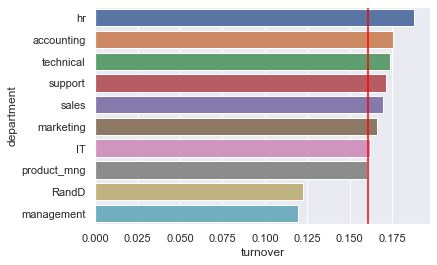

In [36]:
#Plot average attrition by department
sns.barplot(y=avgAttrition.index, x=avgAttrition)
plt.axvline(x=avgAttrition.mean(),
            color='red')

In [37]:
avgMonthlyHours = df.groupby(['department'])['averageMonthlyHours'].mean()
avgMonthlyHours

department
IT             200.638320
RandD          201.291066
accounting     200.877617
hr             199.371048
management     201.529817
marketing      199.487370
product_mng    198.893586
sales          200.242050
support        200.627128
technical      201.115419
Name: averageMonthlyHours, dtype: float64

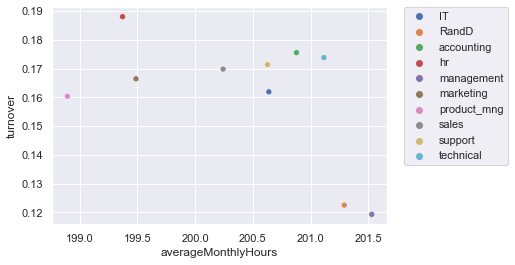

In [38]:
# Create scatterplot for avgMonthlyHours and avgAttrition
sns.scatterplot(x=avgMonthlyHours, y=avgAttrition, hue=avgMonthlyHours.index)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
from scipy.stats import pearsonr
#Calculate correlation coefficient between turnover and averageMonthlyHours
corr, _ = pearsonr(avgMonthlyHours, avgAttrition)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.111


**From Pearson Correlation coefficient of -0.111, we note that there is not a 
significant correlation between working long hours and attrition rate**

In [40]:
temp = df.loc[df["turnover"] == 1,:].groupby('department')['averageMonthlyHours', 'satisfaction'].mean()

In [41]:
temp

,averageMonthlyHours,satisfaction
department,,
IT,209.537975,0.417089
RandD,212.741176,0.433529
accounting,209.541284,0.414679
hr,197.053097,0.422478
management,207.615385,0.435962
marketing,202.142857,0.454375
product_mng,205.972727,0.467909
sales,206.270909,0.450400
support,208.102564,0.451506


<AxesSubplot:xlabel='averageMonthlyHours', ylabel='satisfaction'>

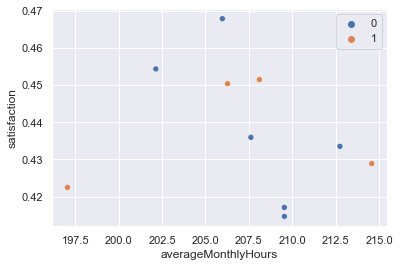

In [42]:
sns.scatterplot(x=temp["averageMonthlyHours"], y=temp["satisfaction"], hue=[0,0,0,1,0,0,0,1,1,1])

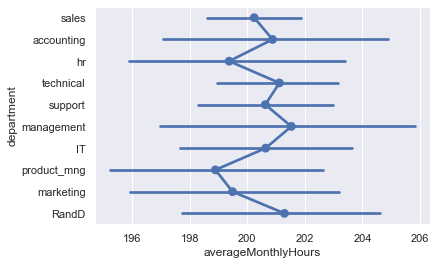

In [43]:
#Distribution of average working hours by department
ax = sns.pointplot(y="department", x="averageMonthlyHours", data=df)

**We note that there is no specific department which is overburdened and working very long hours**

--------

## 7.8 -> Attrition rate is high for employees in the under-worked and over-worked segment

### Key takeaways for the HR Department
- How can the workload be balance across employees?

<AxesSubplot:xlabel='projectCount', ylabel='Density'>

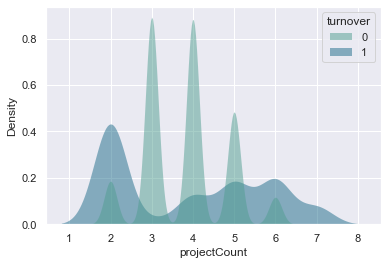

In [44]:
sns.kdeplot(
   data=df, x="projectCount", hue="turnover",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

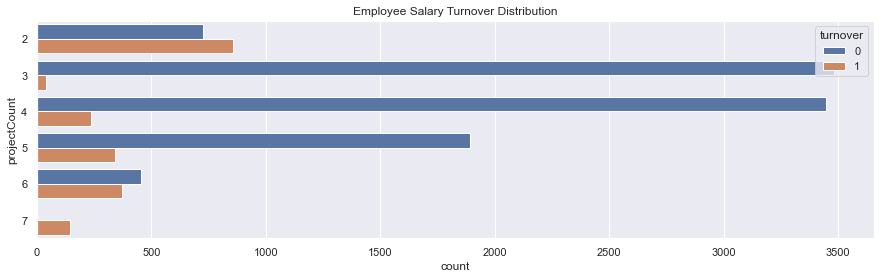

In [45]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="projectCount", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

---------

## 8. Data Pre-Processing (Dummy variables, Test-Train split and Feature Scaling)

In [46]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### 8.1 Create dummy variables for categorical columns

In [47]:
#Get a list of categorical variables columns
categoricalColList = list(df.select_dtypes('object')) 

In [48]:
#Create dummy variables for categorical columns
df = add_dummies(df, categoricalColList, dropx=True)

  department  department_RandD  department_accounting  department_hr  \
0      sales                 0                      0              0   
1      sales                 0                      0              0   
2      sales                 0                      0              0   
3      sales                 0                      0              0   
4      sales                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                   

### 8.2 Create train-test split

In [49]:
#Split the train and test data
df_train, df_test =  model_selection.train_test_split(df,test_size=0.2, random_state=123, stratify=df['turnover'])
print(df_train.shape)
print(df_test.shape)

(9592, 19)
(2399, 19)


### 8.3 Feature scaling

In [50]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [51]:
#Select Numerical Columns to be scaled
num_vars = ['satisfaction','evaluation','averageMonthlyHours', 'yearsAtCompany']
df_train, df_test = scaling(df_train, df_test, num_vars)

In [52]:
# Putting response variable to y
y_train = df_train.pop('turnover')
X_train = df_train

In [53]:
# Putting response variable to y
y_test = df_test.pop('turnover')
X_test = df_test

-------

## 9. Data Modelling

As it is a <b>classification problem</b>, we build the following models for our dataset
- Base Model
- Logistic Regression
- Decision Tree
- AdaBoost
- Random Forest

In [54]:
#We observe that 83.3% of the target variable values as 0.
df['turnover'].value_counts()/df['turnover'].count()

0    0.833959
1    0.166041
Name: turnover, dtype: float64

### 9.1 Base Model

- A Base Model is a model that always selects the target variable's majority class. 
- In out case, the Base Model will predict all the target variables as 0 and ignore the 1s.
- Since, our dataset has 83.3% of the values as 0, so our model will correctly predict 83.3% of the values and hence its accuracy will be 83.3%
- This model is used for reference and our ML models should perform better than the base case model.

In [55]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [70]:
print ("---Base Model---")
accuracy_score = metrics.accuracy_score(y_test, base_rate_model(X_test))
print("Base Model Accuracy rate = %2.2f" % accuracy_score)
base_roc_auc = metrics.roc_auc_score(y_test, base_rate_model(X_test))
print("------")
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print("------")
print("Classification report")
print(metrics.classification_report(y_test, base_rate_model(X_test)))

---Base Model---
Base Model Accuracy rate = 0.83
------
Base Rate AUC = 0.50
------
Classification report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2001
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2399
   macro avg       0.42      0.50      0.45      2399
weighted avg       0.70      0.83      0.76      2399



### 9.2 Logisitic Regression

In [77]:
# Build Logistic Regression model
logisticModel = linear_model.LogisticRegression(penalty='l2', C=1)
logisticModel.fit(X_train, y_train)

LogisticRegression(C=1)

In [81]:
# Check model performance on the test set
print ("Logistic model Accuracy rate = %2.2f" % metrics.accuracy_score(y_test, logisticModel.predict(X_test)))

Logistic model Accuracy rate = 0.83


In [82]:
print ("Logistic Model AUC = %2.2f" % metrics.roc_auc_score(y_test, logisticModel.predict(X_test)))

Logistic Model AUC = 0.58


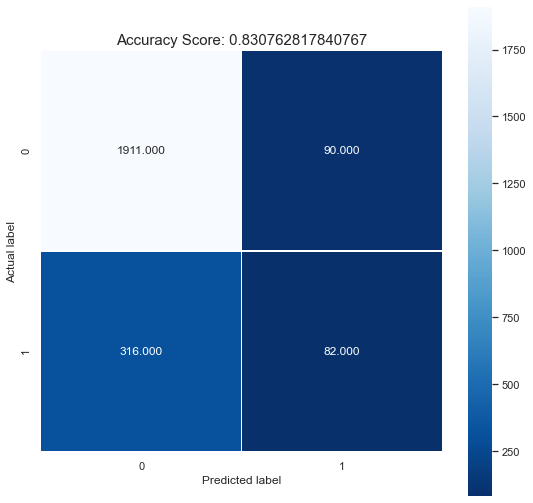

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test, logisticModel.predict(X_test))
#Visualize Confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [85]:
print("Classification report")
print(metrics.classification_report(y_test, logisticModel.predict(X_test)))

Classification report
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2001
           1       0.48      0.21      0.29       398

    accuracy                           0.83      2399
   macro avg       0.67      0.58      0.60      2399
weighted avg       0.79      0.83      0.80      2399



In [ ]:
# # Using 10 fold Cross-Validation to train our Logistic Regression Model
# kfold = model_selection.KFold(n_splits=10, random_state=7)
# modelCV = linear_model.LogisticRegression(class_weight = "balanced")
# scoring = 'roc_auc'
# results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
# print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

**Recursive Feature Elimination**

In [ ]:
#Initialize Logistic Regression model
logreg = linear_model.LogisticRegression(random_state = 101)

In [ ]:
rfecv = feature_selection.RFECV(estimator=logreg, step=1, cv=model_selection.StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

In [ ]:
#Optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
#Print model score
rfecv.score(X_train, y_train)

In [ ]:
#Display columns which are not important
print(np.where(rfecv.support_ == False)[0])

#Drop unimportant columns
# X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
# X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [ ]:
X_train

In [ ]:
X_test

### 9.3 Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [ ]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))


### 9.4 ROC Graph

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


### 9.5 Feature Importance

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()
